# RDS HW3 Template

Install the Data Synthesizer library.

# Section

In [ ]:
!pip install DataSynthesizer

In [ ]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import DataSynthesizer.DataGenerator as dg
dg.np = np

In [ ]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']

    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [ ]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']

    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [ ]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)

    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)

    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [ ]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# Please follow the steps as instructed when you run the following commands.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileid_compas = '1kgSIBkOM9y0nz_l8LI8ze9TAhF5gbb64'
real_data_file = 'hw_compas.csv'

fileid_fake = '1b_T0SHQUMbVvZueZ6yXlxTKBHctMgM0k'
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas})
downloaded.GetContentFile(real_data_file)
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake})
downloaded.GetContentFile(fake_data_file)
df_fake = pd.read_csv(fake_data_file)

In [ ]:
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

description_files = {'A': './descrption_A.json',
                     'B': './descrption_B.json',
                     'C': './descrption_C.json',
                     'D': './descrption_D.json'}

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

## Part (a)

### Q1

Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [ ]:
# Your code here
statistics_comparison = {
    'hw_compas': df_real[['age', 'score']].agg(['median', 'mean', 'min', 'max']),
    'A': df_real_A[['age', 'score']].agg(['median', 'mean', 'min', 'max']),
    'B': df_real_B[['age', 'score']].agg(['median', 'mean', 'min', 'max']),
    'C': df_real_C[['age', 'score']].agg(['median', 'mean', 'min', 'max']),
    'D': df_real_D[['age', 'score']].agg(['median', 'mean', 'min', 'max'])
}

In [16]:
statistics_comparison = pd.concat(statistics_comparison.values(), keys = statistics_comparison.keys(), axis = 1)
statistics_comparison

hw_compas                    A                 B                 C  \
              age      score       age    score      age    score      age   
median  32.000000   4.000000   51.0000   5.0000  33.0000   4.0000  36.0000   
mean    35.143319   4.371268   50.1731   4.9392  35.7354   4.3657  41.5788   
min     18.000000  -1.000000    0.0000  -1.0000  18.0000   1.0000  18.0000   
max     96.000000  10.000000  100.0000  10.0000  76.0000  10.0000  96.0000   

                       D          
          score      age   score  
median   5.0000  39.0000   4.000  
mean     4.9487  44.1532   4.466  
min     -1.0000  18.0000  -1.000  
max     10.0000  96.0000  10.000

In [18]:
for column in ['A', 'B', 'C', 'D']:
  statistics_comparison[column] = statistics_comparison['hw_compas'] - statistics_comparison[column]

In [21]:
statistics_comparison

hw_compas                     A                    B            \
              age      score        age     score        age     score   
median  32.000000   4.000000 -19.000000 -1.000000  -1.000000  0.000000   
mean    35.143319   4.371268 -15.029781 -0.567932  -0.592081  0.005568   
min     18.000000  -1.000000  18.000000  0.000000   0.000000 -2.000000   
max     96.000000  10.000000  -4.000000  0.000000  20.000000  0.000000   

               C                   D            
             age     score       age     score  
median -4.000000 -1.000000 -7.000000  0.000000  
mean   -6.435481 -0.577432 -9.009881 -0.094732  
min     0.000000  0.000000  0.000000  0.000000  
max     0.000000  0.000000  0.000000  0.000000

In [22]:
# exporting the latex table for my report
latex_table = statistics_comparison.to_latex()
print(latex_table)

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{hw_compas} & \multicolumn{2}{r}{A} & \multicolumn{2}{r}{B} & \multicolumn{2}{r}{C} & \multicolumn{2}{r}{D} \\
 & age & score & age & score & age & score & age & score & age & score \\
\midrule
median & 32.000000 & 4.000000 & -19.000000 & -1.000000 & -1.000000 & 0.000000 & -4.000000 & -1.000000 & -7.000000 & 0.000000 \\
mean & 35.143319 & 4.371268 & -15.029781 & -0.567932 & -0.592081 & 0.005568 & -6.435481 & -0.577432 & -9.009881 & -0.094732 \\
min & 18.000000 & -1.000000 & 18.000000 & 0.000000 & 0.000000 & -2.000000 & 0.000000 & 0.000000 & 0.000000 & 0.000000 \\
max & 96.000000 & 10.000000 & -4.000000 & 0.000000 & 20.000000 & 0.000000 & 0.000000 & 0.000000 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}



### Q2

Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

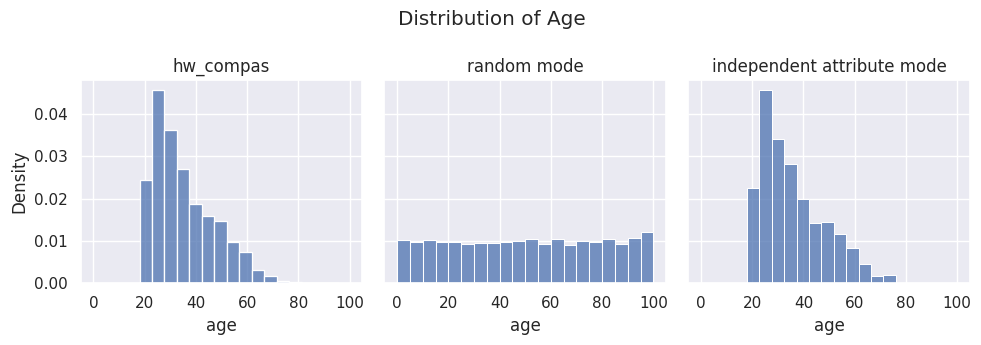

In [23]:
# Your code here
fig, ax = plt.subplots(1, 3, figsize = (10, 3.5), sharex = True, sharey = True)
sns.histplot(df_real['age'], stat = 'density', binwidth = 5, ax = ax[0])
ax[0].set_title('hw_compas')
sns.histplot(df_real_A['age'], stat = 'density', binwidth = 5, ax = ax[1])
ax[1].set_title('random mode')
sns.histplot(df_real_B['age'], stat = 'density', binwidth = 5, ax = ax[2])
ax[2].set_title('independent attribute mode')
fig.suptitle('Distribution of Age')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

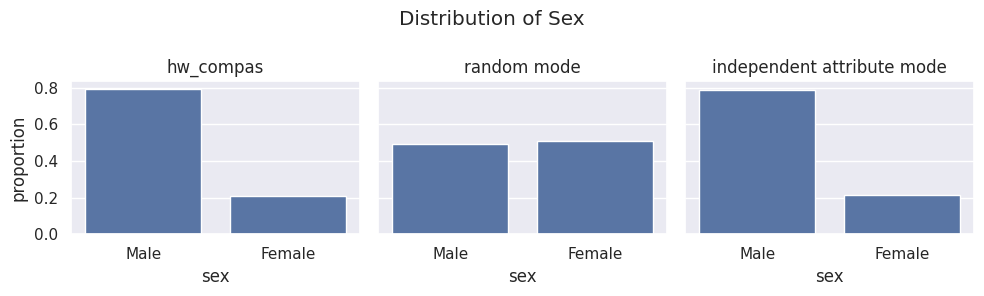

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3), sharex = True, sharey = True)
sns.countplot(df_real, x = 'sex', stat = 'proportion', orient = 'v', ax = ax[0])
ax[0].set_title('hw_compas')
sns.countplot(df_real_A, x = 'sex', stat = 'proportion', orient = 'v', ax = ax[1])
ax[1].set_title('random mode')
sns.countplot(df_real_B, x = 'sex', stat = 'proportion', orient = 'v', ax = ax[2])
ax[2].set_title('independent attribute mode')
fig.suptitle('Distribution of Sex')
plt.tight_layout()
plt.savefig('sex_distribution.png')
plt.show()

#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [25]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

#### KL-divergence for categorical attributes

In [26]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [27]:
distribution_comparison = {
    'random mode': [ks_test(df_real, df_real_A, 'age'), kl_test(df_real, df_real_A, 'sex')],
    'independent attribute mode': [ks_test(df_real, df_real_B, 'age'), kl_test(df_real, df_real_B, 'sex')]
}

In [28]:
dist_comparison_df = pd.DataFrame.from_dict(distribution_comparison, orient = 'index', columns = ['KS test (age)', 'KL-Divergence (sex)'])

In [29]:
dist_comparison_df

,KS test (age),KL-Divergence (sex)
random mode,0.373509,0.223198
independent attribute mode,0.026252,0.000249


In [30]:
# exporting the latex table for my report
dist_comparison_table = dist_comparison_df.to_latex()
print(dist_comparison_table)

\begin{tabular}{lrr}
\toprule
 & KS test (age) & KL-Divergence (sex) \\
\midrule
random mode & 0.373509 & 0.223198 \\
independent attribute mode & 0.026252 & 0.000249 \\
\bottomrule
\end{tabular}



### Q3

some more sophisticated statistical measure that’s good for correlated attribute mode, and will be better with k=2 (case D) than with k=1 (case C), __some distance over pairwise correlation coefficients? Also show the difference visually, comparing results on real vs. synthetic datasets__.

<ipython-input-31-24f1fbe58e07>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect = [0, 0, .9, 1])


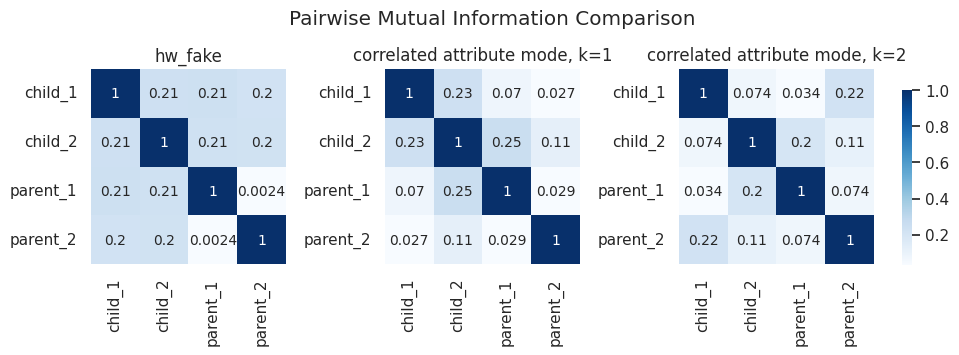

In [31]:
# Use pairwise_attributes_mutual_information function.
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31
# Your code here
fig, ax = plt.subplots(1, 3, figsize = (10, 3.5))
cbar_ax = fig.add_axes([.91, .25, .01, .5])
sns.heatmap(pairwise_attributes_mutual_information(df_fake), annot = True, annot_kws = {'size': 10}, fmt = '.2g', square = True, cbar = False, cmap = 'Blues', ax = ax[0])
ax[0].set_title('hw_fake')
sns.heatmap(pairwise_attributes_mutual_information(df_fake_C), annot = True, annot_kws = {'size': 10}, fmt = '.2g', square = True, cbar = False, cmap = 'Blues', ax = ax[1])
ax[1].set_title('correlated attribute mode, k=1')
sns.heatmap(pairwise_attributes_mutual_information(df_fake_D), annot = True, annot_kws = {'size': 10}, fmt = '.2g', square = True, cbar = True, cbar_ax = cbar_ax, cmap = 'Blues', ax = ax[2])
ax[2].set_title('correlated attribute mode, k=2')
fig.suptitle('Pairwise Mutual Information Comparison')
plt.tight_layout(rect = [0, 0, .9, 1])
plt.savefig('mutual_info.png')
plt.show()

In [32]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Your code here

mutual_info_real = np.triu(pairwise_attributes_mutual_information(df_real), 1)
mutual_info_C = np.triu(pairwise_attributes_mutual_information(df_real_C), 1)
mutual_info_D = np.triu(pairwise_attributes_mutual_information(df_real_D), 1)

mi_dist_C = np.sum(np.abs(mutual_info_real - mutual_info_C))
mi_dist_D = np.sum(np.abs(mutual_info_real - mutual_info_D))

mutual_info_C_D = {
    'correlated attribute mode, k=1': mi_dist_C,
    'correlated attribute mode, k=2': mi_dist_D
}

mi_CD_df = pd.DataFrame.from_dict(mutual_info_C_D, orient = 'index', columns = ['Mutual Information Distance'])

In [33]:
mi_CD_df

,Mutual Information Distance
"correlated attribute mode, k=1",0.131363
"correlated attribute mode, k=2",0.169164


In [34]:
# exporting the latex table for my report
mi_CD_table = mi_CD_df.to_latex()
print(mi_CD_table)

\begin{tabular}{lr}
\toprule
 & Mutual Information Distance \\
\midrule
correlated attribute mode, k=1 & 0.131363 \\
correlated attribute mode, k=2 & 0.169164 \\
\bottomrule
\end{tabular}



## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [36]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Your code here

from collections import defaultdict

output_data_size = 10000
epsilon = 0.1
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

median = defaultdict(list)
mean = defaultdict(list)
min = defaultdict(list)
max = defaultdict(list)

for mode in ['A', 'B', 'C']:
    for seed in seeds:
        if mode == 'A':
            synthetic_data = generate_data_A(real_data_file, output_data_size, seed=seed)
        elif mode == 'B':
            synthetic_data = generate_data_B(real_data_file, output_data_size, epsilon=epsilon, seed=seed)
        else:
            synthetic_data = generate_data_C(real_data_file, output_data_size, epsilon=epsilon, seed=seed)

        median[mode].append(synthetic_data['age'].median())
        mean[mode].append(synthetic_data['age'].mean())
        min[mode].append(synthetic_data['age'].min())
        max[mode].append(synthetic_data['age'].max())

        clear_output()

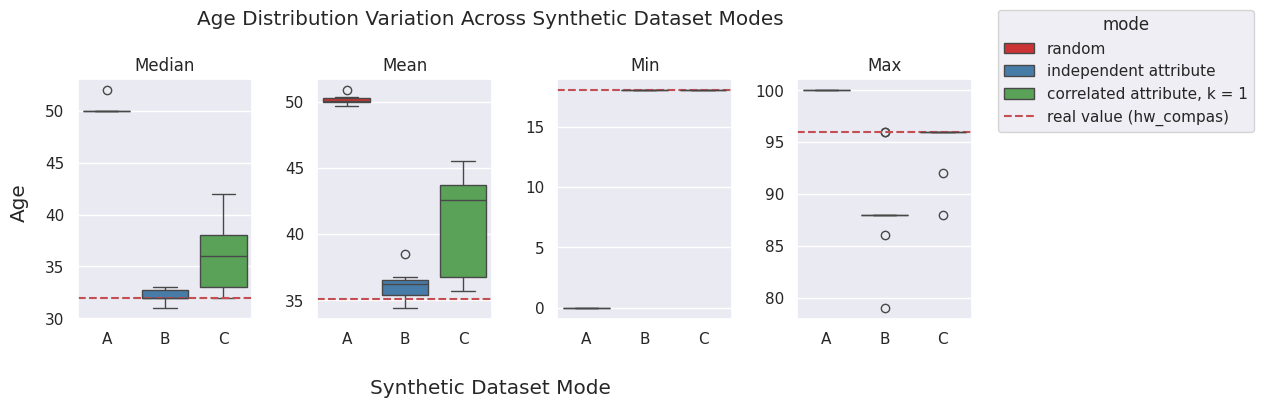

In [44]:
fig, ax = plt.subplots(1, 4, figsize = (10, 4))
palette = 'Set1'
sns.boxplot(median, palette = palette, ax = ax[0])
ax[0].set_title('Median')
ax[0].axhline(df_real['age'].agg('median'), linestyle = '--', color = 'r')
sns.boxplot(mean, palette = palette, ax = ax[1])
ax[1].set_title('Mean')
ax[1].axhline(df_real['age'].agg('mean'), linestyle = '--', color = 'r')
sns.boxplot(min, palette = palette, ax = ax[2])
ax[2].set_title('Min')
ax[2].axhline(df_real['age'].agg('min'), linestyle = '--', color = 'r')
sns.boxplot(max, palette = palette, ax = ax[3])
ax[3].set_title('Max')
ax[3].axhline(df_real['age'].agg('max'), linestyle = '--', color = 'r')
fig.legend(['random', 'independent attribute', 'correlated attribute, k = 1', 'real value (hw_compas)'], title = 'mode', bbox_to_anchor = (1, 1), loc = 'upper left')
fig.suptitle('Age Distribution Variation Across Synthetic Dataset Modes')
fig.supxlabel('Synthetic Dataset Mode')
fig.supylabel('Age')
plt.tight_layout()
plt.savefig('age_boxplots.png', bbox_inches = 'tight')
plt.show()

In [38]:
age_statistics = {
    'median': pd.DataFrame.from_dict(median).mean(),
    'mean': pd.DataFrame.from_dict(mean).mean(),
    'min': pd.DataFrame.from_dict(min).mean(),
    'max': pd.DataFrame.from_dict(max).mean()
}

In [39]:
age_statistics_df = pd.concat(age_statistics.values(), keys = age_statistics.keys(), axis = 1).T
age_statistics_df.insert(0, 'hw_compas', df_real['age'].agg(['median', 'mean', 'min', 'max']))
age_statistics_df

,hw_compas,A,B,C
median,32.000000,50.20000,32.20000,35.90000
mean,35.143319,50.10166,36.11932,40.94772
min,18.000000,0.00000,18.00000,18.00000
max,96.000000,100.00000,88.50000,94.80000


In [40]:
for column in ['A', 'B', 'C']:
  age_statistics_df[column] = age_statistics_df['hw_compas'] - age_statistics_df[column]

In [41]:
# exporting the latex table for my report
age_statistics_table = age_statistics_df.to_latex()
print(age_statistics_table)

\begin{tabular}{lrrrr}
\toprule
 & hw_compas & A & B & C \\
\midrule
median & 32.000000 & -18.200000 & -0.200000 & -3.900000 \\
mean & 35.143319 & -14.958341 & -0.976001 & -5.804401 \\
min & 18.000000 & 18.000000 & 0.000000 & 0.000000 \\
max & 96.000000 & -4.000000 & 7.500000 & 1.200000 \\
\bottomrule
\end{tabular}



## Part (c)

Study how accuracy of Q3 changes for case **C**, as you vary __epsilon__ = [0.01, 0.02, ..., 0.1].

In [57]:
# Your code here

def run_experiment(test_type, epsilons, df):
  output_data_size = 10000

  if df == 'real':
    df = df_real
    data_file = real_data_file
  else:
    df = df_fake
    data_file = fake_data_file

  if test_type == 'mi':
    mutual_info_ref = np.triu(pairwise_attributes_mutual_information(df), 1)

  result_B, result_C, result_D = defaultdict(list), defaultdict(list), defaultdict(list)

  for mode, generate_method, result_dict in zip(['B', 'C', 'D'], [generate_data_B, generate_data_C, generate_data_D], [result_B, result_C, result_D]):
    for epsilon in epsilons:
      for seed in range(10):
        synthetic = generate_method(data_file, output_data_size, epsilon = epsilon, seed = seed)
        if test_type == 'kl':
          result_dict[epsilon].append(kl_test(df, synthetic, 'race'))
        elif test_type == 'mi':
          mutual_info_synthetic = np.triu(pairwise_attributes_mutual_information(synthetic), 1)
          aggregated_diff = np.sum(np.abs(mutual_info_ref - mutual_info_synthetic))
          result_dict[epsilon].append(aggregated_diff)

        clear_output()

  return result_B, result_C, result_D

In [58]:
def plotting(result_B, result_C, result_D, test_name, save_path):
  palette = 'viridis'
  fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharey = True)
  sns.boxplot(result_B, palette = palette, ax = ax[0])
  ax[0].set_title('independent attribute')
  sns.boxplot(result_C, palette = palette, ax = ax[1])
  ax[1].set_title('correlated attribute, k=1')
  sns.boxplot(result_D, palette = palette, ax = ax[2])
  ax[2].set_title('correlated attribute, k=2')
  fig.suptitle(f'{test_name} For Synthetic Dataset Modes Across Epsilon Values')
  fig.supxlabel('Epsilon')
  fig.supylabel(test_name)
  plt.tight_layout()
  plt.savefig(save_path, bbox_inches = 'tight')
  plt.show()

In [59]:
epsilons_mst_kl = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [62]:
kl_result_B, kl_result_C, kl_result_D = run_experiment('kl', epsilons_mst_kl, 'real')

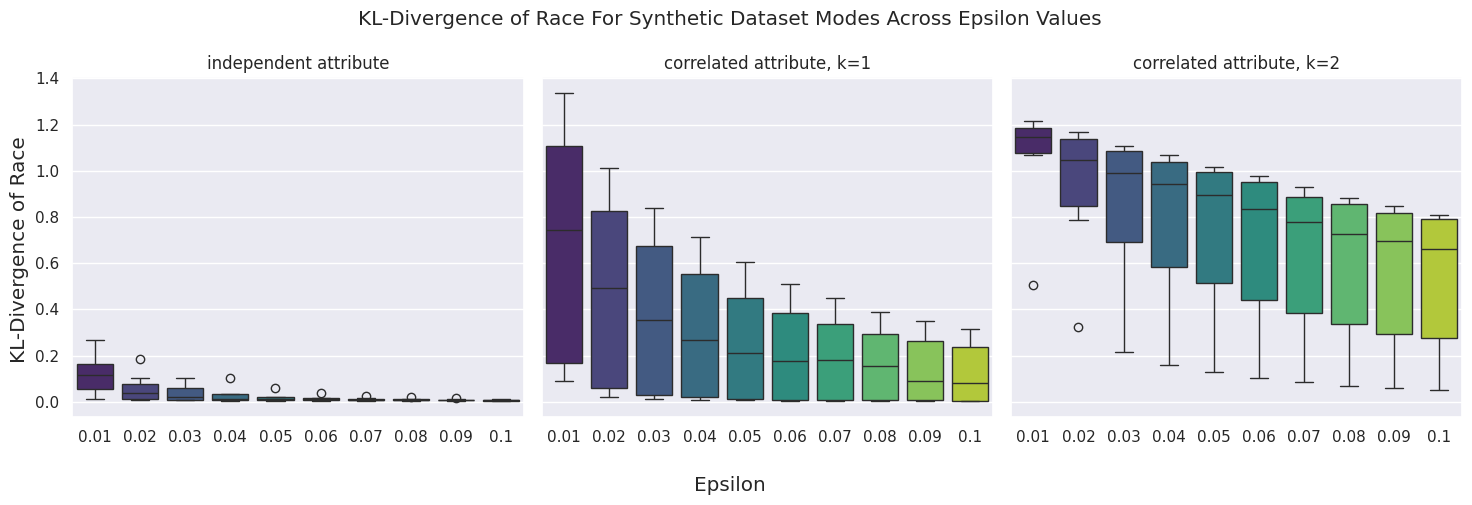

In [63]:
plotting(kl_result_B, kl_result_C, kl_result_D, 'KL-Divergence of Race', 'kl_boxplots.png')

#### Mutual Information Plot for MST
Again, replicate your plots from Part (c) for MST, this time for mutual information, on both hw_compas and hw_fake (df_real and df_fake), varying epsilon = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. Compare this plot to the plot of dataset **D** (df_real_D). Once again, you need only generate **5 datasets** per epsilon (i.e., run 5 iterations per epsilon).

In [65]:
def mutual_info_plotting(results, test_name, save_path):
  palette = 'hls'
  g = sns.catplot(mi_df, x = 'epsilon', y = 'mi', hue = 'dataset', col = 'mode', palette = palette, kind = 'box', height = 5)
  g.fig.suptitle(f'{test_name} For Synthetic Dataset Modes Across Epsilon Values')
  g.fig.supxlabel('Epsilon')
  g.fig.supylabel(test_name)
  g.set_xlabels('')
  g.set_ylabels('')
  g.set_titles('{col_name}')
  g.fig.tight_layout(rect = [0, 0, 0.9, 1])
  plt.savefig(save_path, bbox_inches = 'tight')
  plt.show()

In [66]:
epsilons_mst_mi = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [67]:
mi_result_real_B, mi_result_real_C, mi_result_real_D = run_experiment(test_type = 'mi', epsilons = epsilons_mst_mi, df = 'real')

In [68]:
mi_result_fake_B, mi_result_fake_C, mi_result_fake_D = run_experiment(test_type = 'mi', epsilons = epsilons_mst_mi, df = 'fake')

In [69]:
mi_df_real_B = pd.DataFrame(mi_result_real_B).melt(var_name = 'epsilon', value_name = 'mi').assign(dataset = 'hw_compas')
mi_df_fake_B = pd.DataFrame(mi_result_fake_B).melt(var_name = 'epsilon', value_name = 'mi').assign(dataset = 'hw_fake')
mi_df_B = pd.concat([mi_df_real_B, mi_df_fake_B])

mi_df_real_C = pd.DataFrame(mi_result_real_C).melt(var_name = 'epsilon', value_name = 'mi').assign(dataset = 'hw_compas')
mi_df_fake_C = pd.DataFrame(mi_result_fake_C).melt(var_name = 'epsilon', value_name = 'mi').assign(dataset = 'hw_fake')
mi_df_C = pd.concat([mi_df_real_C, mi_df_fake_C])

mi_df_real_D = pd.DataFrame(mi_result_real_D).melt(var_name = 'epsilon', value_name = 'mi').assign(dataset = 'hw_compas')
mi_df_fake_D = pd.DataFrame(mi_result_fake_D).melt(var_name = 'epsilon', value_name = 'mi').assign(dataset = 'hw_fake')
mi_df_D = pd.concat([mi_df_real_D, mi_df_fake_D])

In [70]:
mi_df = pd.concat([mi_df_B.assign(mode = 'individual attribute'), mi_df_C.assign(mode = 'correlated attribute, k=1'), mi_df_D.assign(mode = 'correlated attribute, k=2')])

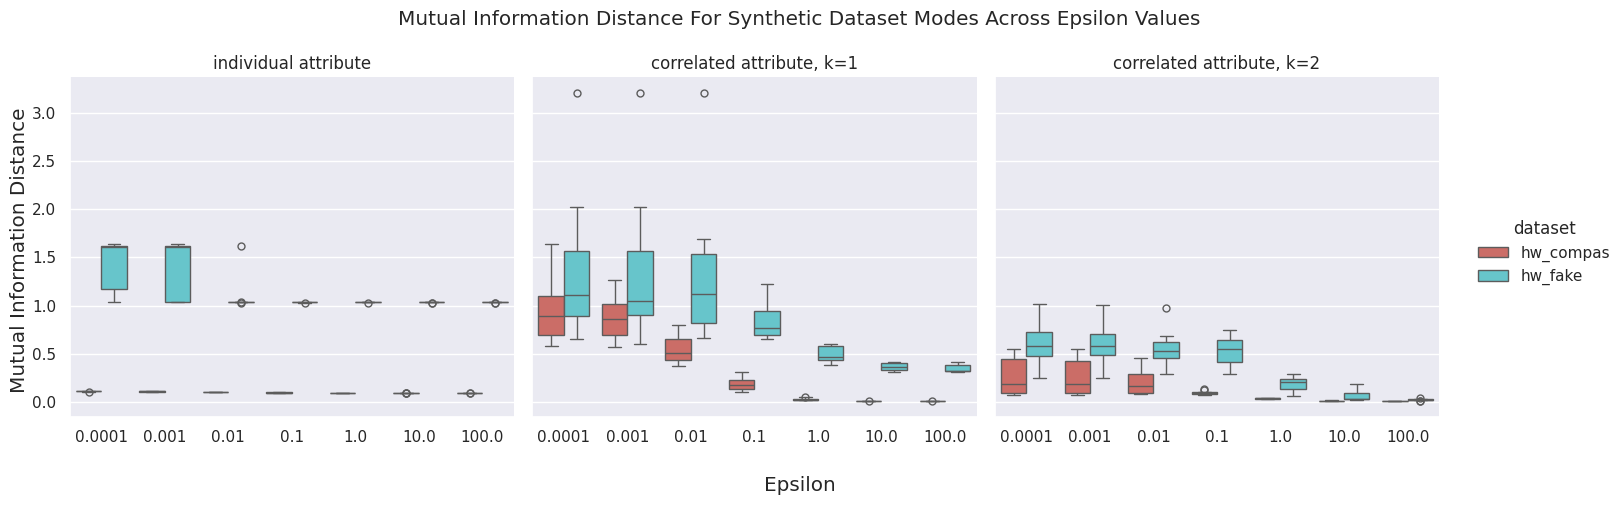

In [71]:
mutual_info_plotting(mi_df, 'Mutual Information Distance', 'mi_boxplots.png')

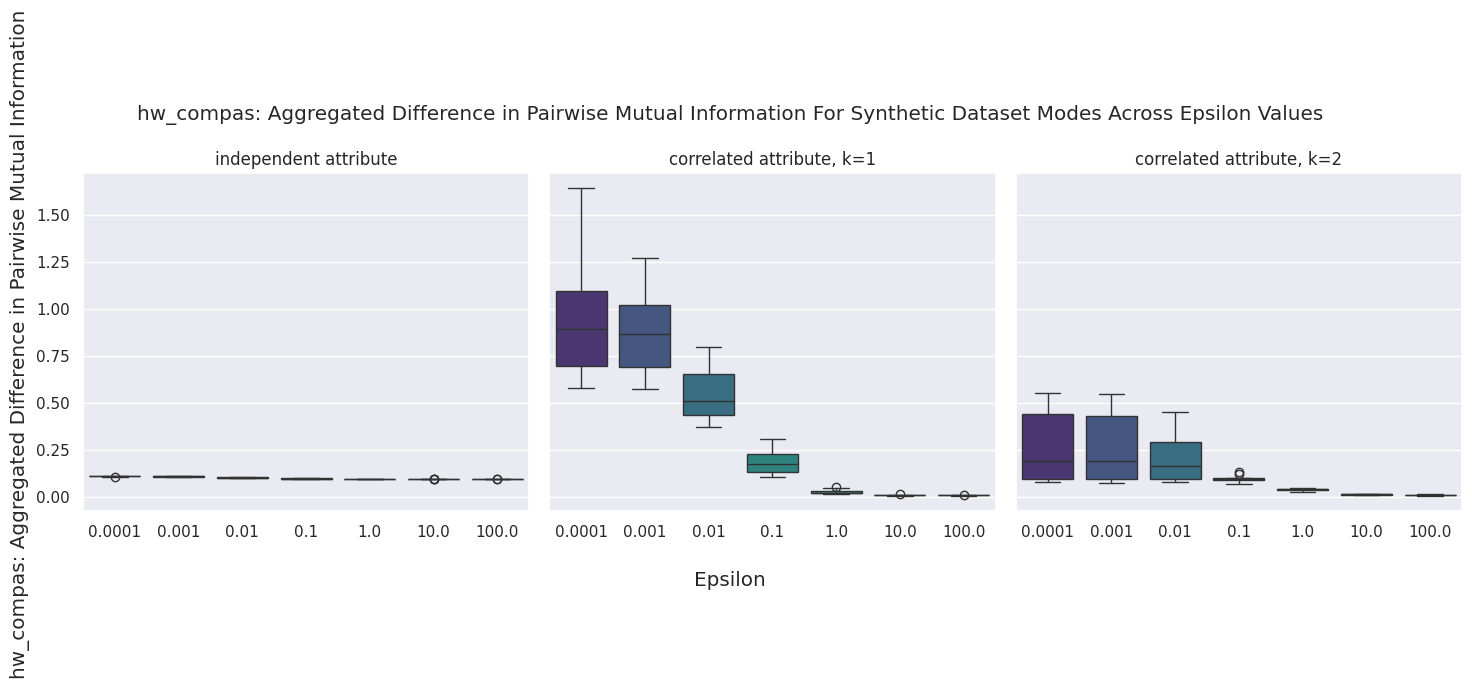

In [75]:
plotting(mi_result_real_B, mi_result_real_C, mi_result_real_D, 'hw_compas: Aggregated Difference in Pairwise Mutual Information', 'mi_boxplots_real.png')

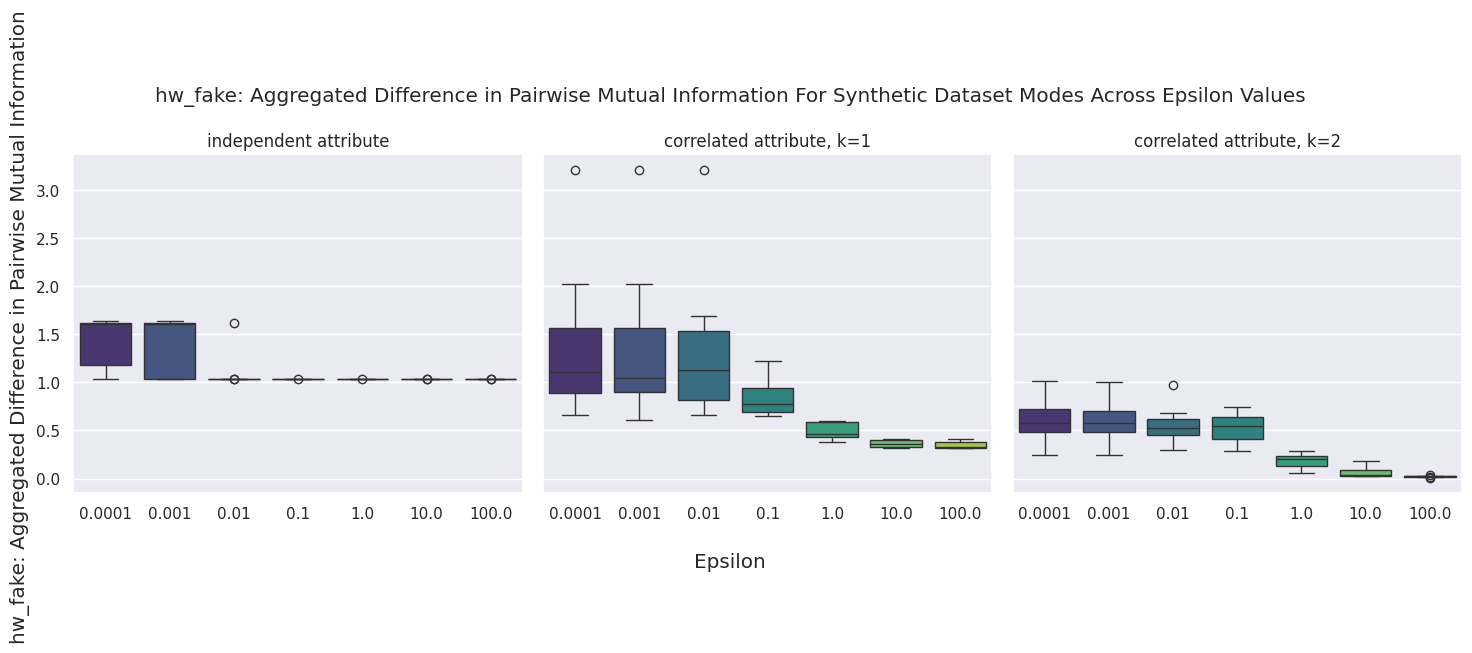

In [76]:
plotting(mi_result_fake_B, mi_result_fake_C, mi_result_fake_D, 'hw_fake: Aggregated Difference in Pairwise Mutual Information', 'mi_boxplots_fake.png')